### MODELS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


In [2]:
lebron_points = pd.read_csv('lebron_points_prepared.csv')

# Eliminar las columnas 'Fecha' y 'Año'
lebron_points = lebron_points.drop(columns=['AñoMes', 'Año'])

print(lebron_points.columns)

Index(['Min', 'FG %', '3PT%', 'FT%', 'Receptions', 'Assists', 'BLK(Tapones)',
       'STL(Recoveries)', 'PF(Personal Faults)', 'TO(Ball Lost)', 'WinBinary',
       'LocalPoints', 'VisitorPoints', 'LebronTeamPoints', 'OtherTeamPoints',
       'Local_Binary', 'FG_made', 'FG_attempted', 'FT_made', 'FT_attempted',
       '3PTS_made', '3PTS_attempted', 'Año_rolling_mean_4',
       'FG %_rolling_mean_4', '3PT%_rolling_mean_4', 'FT%_rolling_mean_4',
       'Receptions_rolling_mean_4', 'Assists_rolling_mean_4',
       'BLK(Tapones)_rolling_mean_4', 'STL(Recoveries)_rolling_mean_4',
       'PF(Personal Faults)_rolling_mean_4', 'TO(Ball Lost)_rolling_mean_4',
       'PTS_rolling_mean_4', 'WinBinary_rolling_mean_4',
       'LocalPoints_rolling_mean_4', 'VisitorPoints_rolling_mean_4',
       'LebronTeamPoints_rolling_mean_4', 'OtherTeamPoints_rolling_mean_4',
       'Local_Binary_rolling_mean_4', 'FG_made_rolling_mean_4',
       'FG_attempted_rolling_mean_4', 'FT_made_rolling_mean_4',
       'FT_a

We are going to divide the dataset in train-test. As we have data shorted by time, and the aim is to predict the future points, we are going to train the models with the 80% of the firts games, and test with the other 20%

In [3]:
# Separar características (X) y variable objetivo (y)
X = lebron_points.drop(columns=['PTS_next_match'])
y = lebron_points['PTS_next_match']

# División de datos en entrenamiento (80%) y prueba (20%) manteniendo el orden
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

#### LR

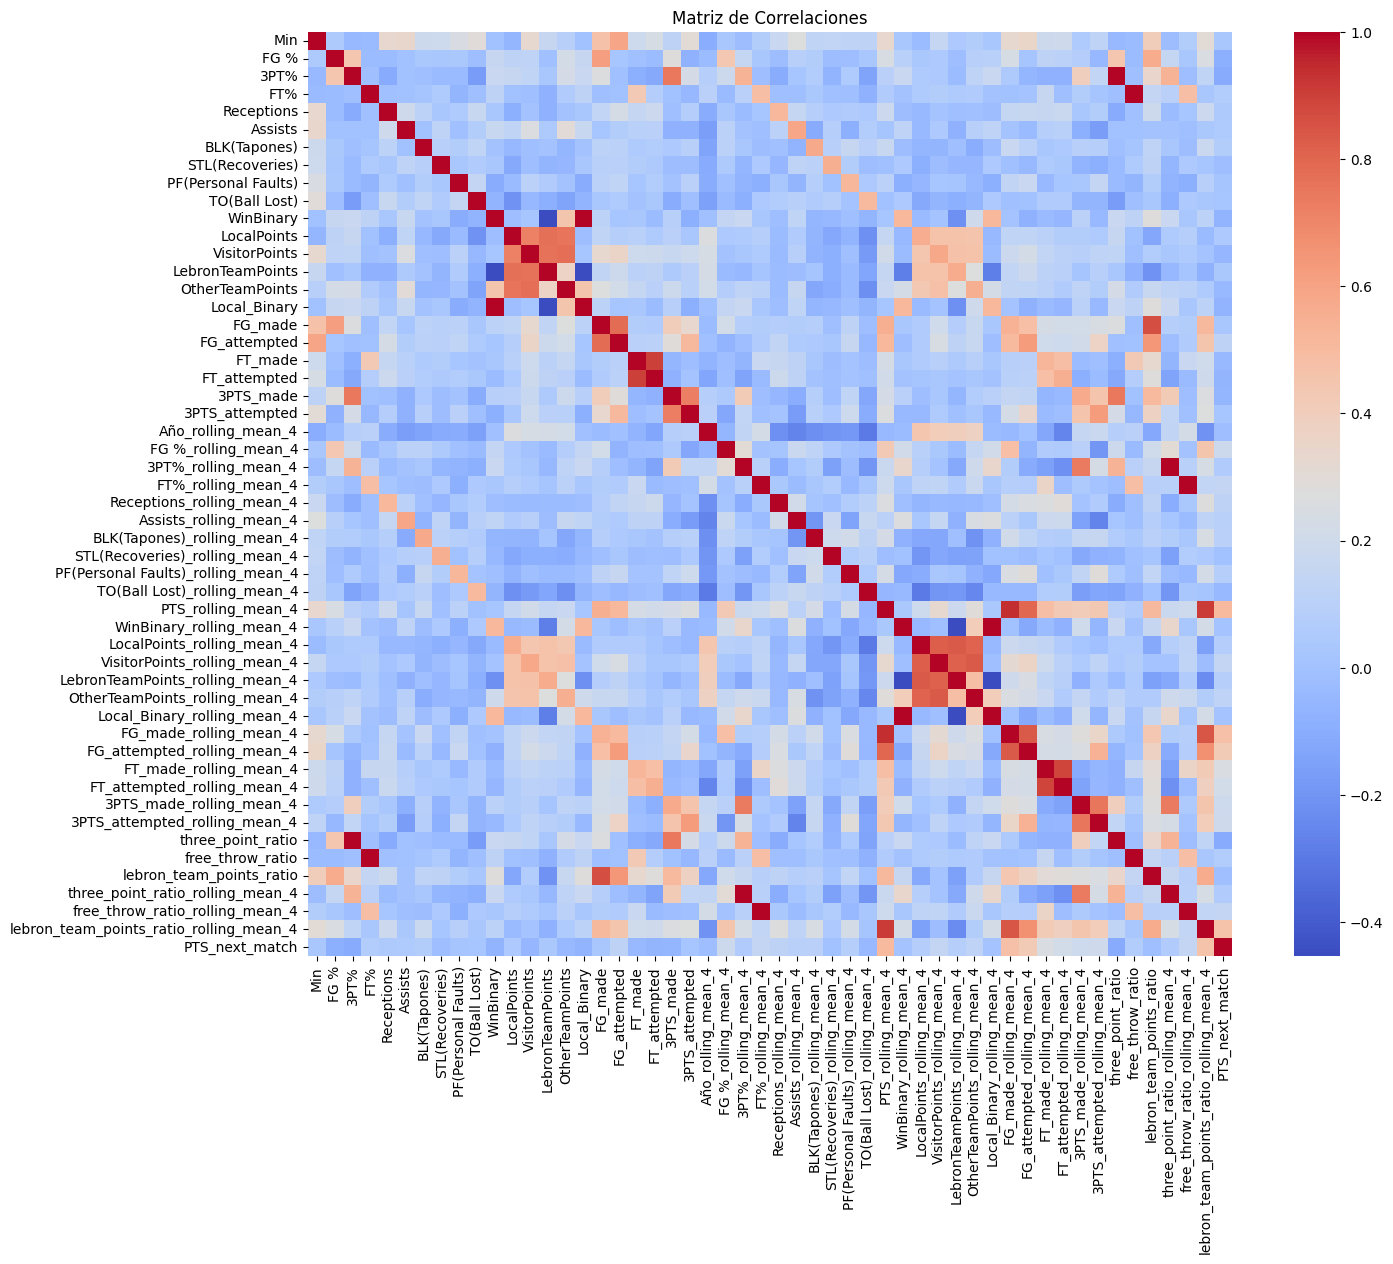

Variables más significativas con respecto a la target:
PTS_rolling_mean_4                         0.504644
FG_made_rolling_mean_4                     0.475492
lebron_team_points_ratio_rolling_mean_4    0.463895
FG_attempted_rolling_mean_4                0.415636
FT_made_rolling_mean_4                     0.256111
FT_attempted_rolling_mean_4                0.213429
3PTS_attempted_rolling_mean_4              0.196934
3PTS_made_rolling_mean_4                   0.190477
FG %_rolling_mean_4                        0.187474
VisitorPoints_rolling_mean_4               0.147968
Name: PTS_next_match, dtype: float64


In [4]:
# Calcular la matriz de correlación
correlation_matrix = lebron_points.corr()

# Visualizar la matriz de correlación con seaborn
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Matriz de Correlaciones")
plt.show()

# Calcular las correlaciones con la variable objetivo
target_correlations = correlation_matrix['PTS_next_match'].drop('PTS_next_match')

# Ordenar las variables por la correlación absoluta
most_significant_variables = target_correlations.abs().sort_values(ascending=False)

# Mostrar las 10 variables más significativas
print("Variables más significativas con respecto a la target:")
print(most_significant_variables.head(10))



In [5]:

# Seleccionar las 10 variables más significativas
top_10_features = most_significant_variables.head(10).index.tolist()

# Crear subconjuntos de datos
X_train_lr = X_train[top_10_features]
X_test_lr = X_test[top_10_features]

# Crear el modelo de regresión lineal
linear_model = LinearRegression()

# Entrenar el modelo
linear_model.fit(X_train_lr, y_train)

# Hacer predicciones
y_pred_lr = linear_model.predict(X_test_lr)

# Calcular métricas de evaluación
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Mostrar resultados
print("Evaluación del modelo de Regresión Lineal:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")


Evaluación del modelo de Regresión Lineal:
Mean Squared Error (MSE): 33.95
Mean Absolute Error (MAE): 4.55
R² Score: 0.20


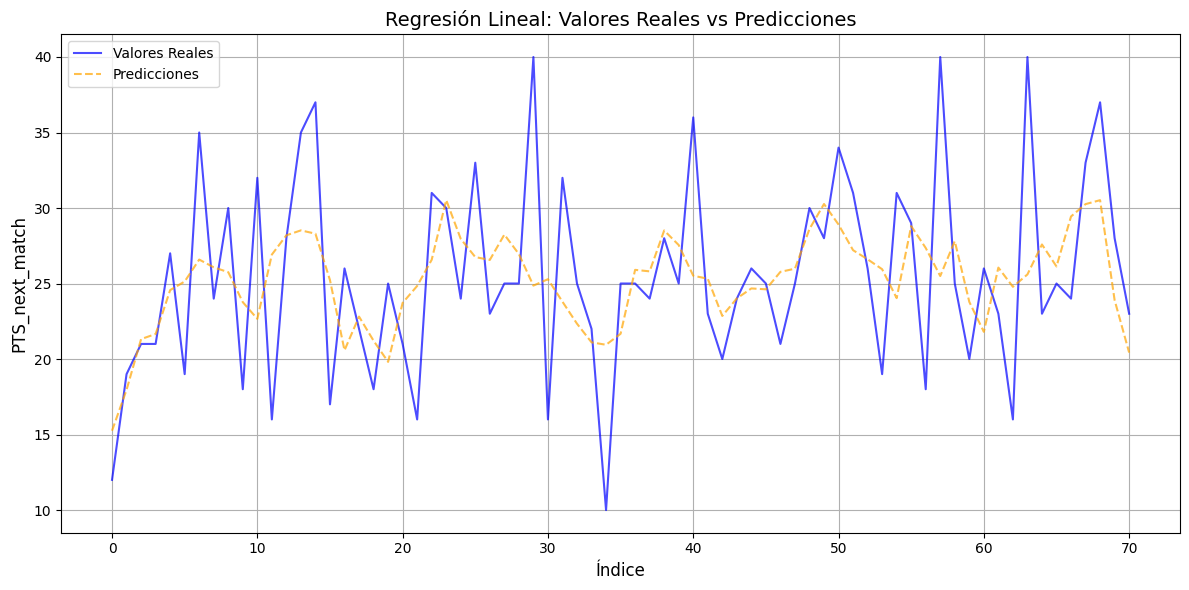

In [6]:

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Valores reales y predichos
plt.plot(y_test.reset_index(drop=True), label="Valores Reales", linestyle='-', color='blue', alpha=0.7)
plt.plot(y_pred_lr, label="Predicciones", linestyle='--', color='orange', alpha=0.7)

# Etiquetas y leyenda
plt.title("Regresión Lineal: Valores Reales vs Predicciones", fontsize=14)
plt.xlabel("Índice", fontsize=12)
plt.ylabel("PTS_next_match", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#### Decision Trees

In [7]:
# Crear el modelo
tree_model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [8]:
# Realizar predicciones
y_pred = tree_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluación del modelo de Árbol de Decisión:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Evaluación del modelo de Árbol de Decisión:
Mean Squared Error (MSE): 74.85
Mean Absolute Error (MAE): 7.01


Let's improve the hyperparameters

In [9]:

# Definir el modelo
tree_model = DecisionTreeRegressor(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 5, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'absolute_error']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=tree_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # Optimizar MSE (usando negativo porque sklearn maximiza por defecto)
    verbose=1,
    n_jobs=-1
)

# Entrenar el modelo con búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Reentrenar el modelo con los mejores parámetros
best_tree_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_tree_model.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print("\nEvaluación del mejor modelo de Árbol de Decisión:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")



Fitting 5 folds for each of 640 candidates, totalling 3200 fits
Mejores parámetros encontrados: {'criterion': 'absolute_error', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 2}

Evaluación del mejor modelo de Árbol de Decisión:
Mean Squared Error (MSE): 41.40
Mean Absolute Error (MAE): 5.10


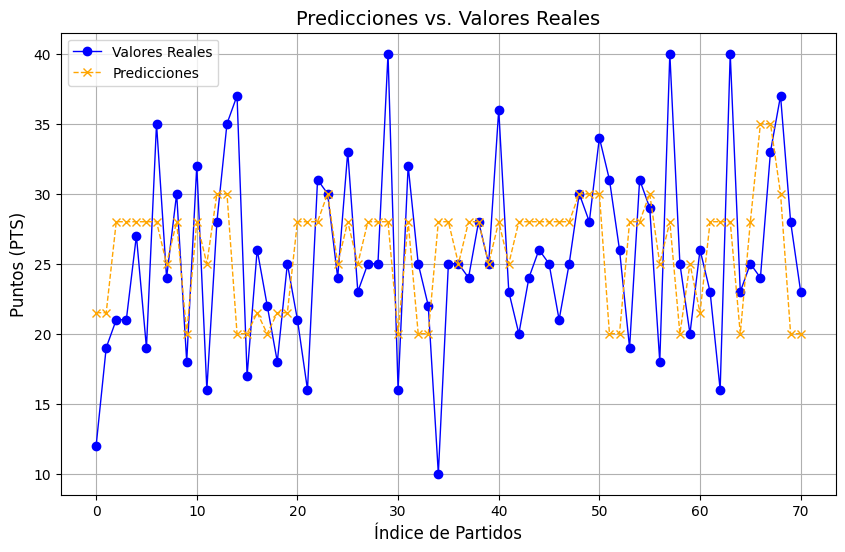

In [10]:
# Graficar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reales', color='blue', marker='o', linestyle='-', linewidth=1)
plt.plot(y_pred, label='Predicciones', color='orange', marker='x', linestyle='--', linewidth=1)

# Configuración del gráfico
plt.title('Predicciones vs. Valores Reales', fontsize=14)
plt.xlabel('Índice de Partidos', fontsize=12)
plt.ylabel('Puntos (PTS)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#### RandomForest

In [11]:

# Definir el modelo
rf_model = RandomForestRegressor(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],            # Número de árboles en el bosque
    'max_depth': [None, 5, 7, 10, 20, 30],           # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 7, 10, 15],           # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],             # Mínimo de muestras en una hoja
    'max_features': [5, 10, 'sqrt', 'log2', None]     # Número máximo de características consideradas
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,                                      # Validación cruzada
    scoring='neg_mean_squared_error',          # Usar MSE como métrica (negativo para maximizar)
    verbose=1,
    n_jobs=-1                                  # Usar todos los núcleos disponibles
)

# Entrenar el modelo con búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y parámetros
best_rf_model = grid_search.best_estimator_
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Realizar predicciones
y_pred = best_rf_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("\nEvaluación del mejor modelo de Random Forest:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Fitting 5 folds for each of 2250 candidates, totalling 11250 fits
Mejores parámetros encontrados: {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}

Evaluación del mejor modelo de Random Forest:
Mean Squared Error (MSE): 32.68
Mean Absolute Error (MAE): 4.36


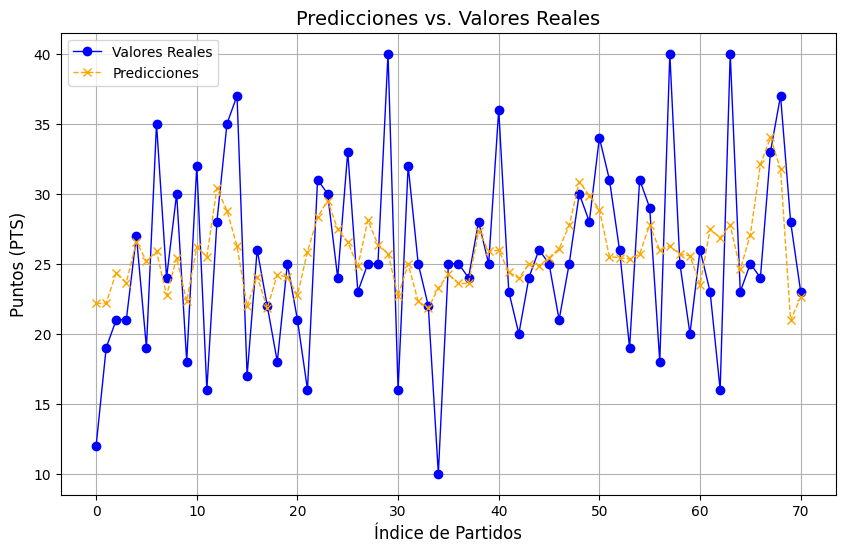

In [12]:
# Graficar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reales', color='blue', marker='o', linestyle='-', linewidth=1)
plt.plot(y_pred, label='Predicciones', color='orange', marker='x', linestyle='--', linewidth=1)

# Configuración del gráfico
plt.title('Predicciones vs. Valores Reales', fontsize=14)
plt.xlabel('Índice de Partidos', fontsize=12)
plt.ylabel('Puntos (PTS)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Let's try just with the 10 most correlated features

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Mejores hiperparámetros encontrados:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200, 'random_state': 42}
Evaluación del modelo RandomForest con GridSearchCV:
Mean Squared Error (MSE): 36.28
Mean Absolute Error (MAE): 4.69


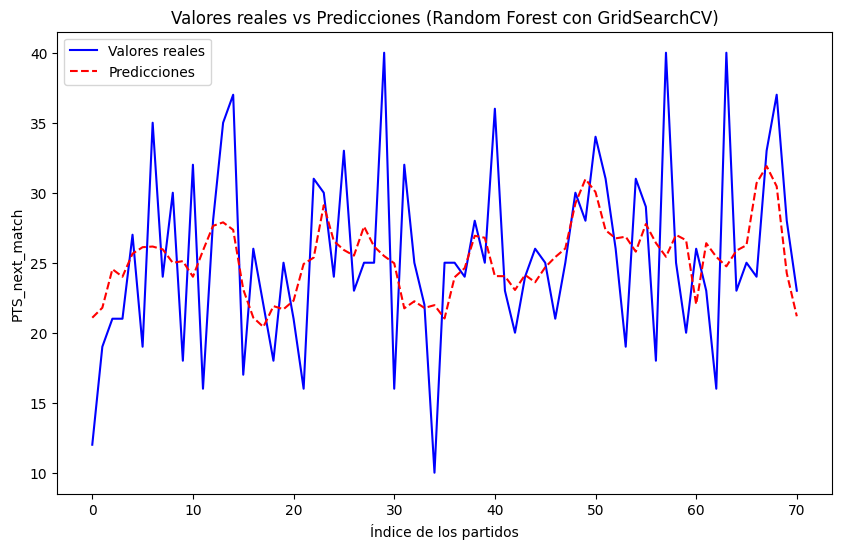

In [13]:
# Calcular la correlación entre todas las variables numéricas y la columna objetivo 'PTS_next_match'
correlation_matrix = lebron_points.corr()

# Obtener las 10 variables con mayor correlación con 'PTS_next_match'
top_10_features = correlation_matrix['PTS_next_match'].abs().sort_values(ascending=False).head(11).index.tolist()
top_10_features.remove('PTS_next_match')  # Eliminar la variable objetivo de la lista

# Crear los conjuntos de entrenamiento y prueba con las 10 características más correlacionadas
X = lebron_points[top_10_features]
y = lebron_points['PTS_next_match']

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Definir el modelo RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],         # Número de árboles
    'max_depth': [None, 10, 20, 30],         # Profundidad máxima
    'min_samples_split': [2, 5, 10],         # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],           # Mínimo número de muestras en una hoja
    'max_features': [None, 'sqrt', 'log2'],  # Características a considerar
    'random_state': [42]
}

# Definir el GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mostrar el mejor modelo encontrado
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

# Evaluar el modelo con el conjunto de prueba
y_pred_rf_best = best_rf_model.predict(X_test)

# Calcular métricas de evaluación
mse_best = mean_squared_error(y_test, y_pred_rf_best)
mae_best = mean_absolute_error(y_test, y_pred_rf_best)
r2_best = r2_score(y_test, y_pred_rf_best)

print("Evaluación del modelo RandomForest con GridSearchCV:")
print(f"Mean Squared Error (MSE): {mse_best:.2f}")
print(f"Mean Absolute Error (MAE): {mae_best:.2f}")

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores reales', color='blue')
plt.plot(y_pred_rf_best, label='Predicciones', color='red', linestyle='--')
plt.legend()
plt.title("Valores reales vs Predicciones (Random Forest con GridSearchCV)")
plt.xlabel("Índice de los partidos")
plt.ylabel("PTS_next_match")
plt.show()



#### XGBOOST

Finally, we are going to try xgboost. But the results are not really good

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Mejores parámetros encontrados:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
Mean Squared Error (MSE) con el mejor modelo: 36.92
Mean Absolute Error (MAE) con el mejor modelo: 4.64


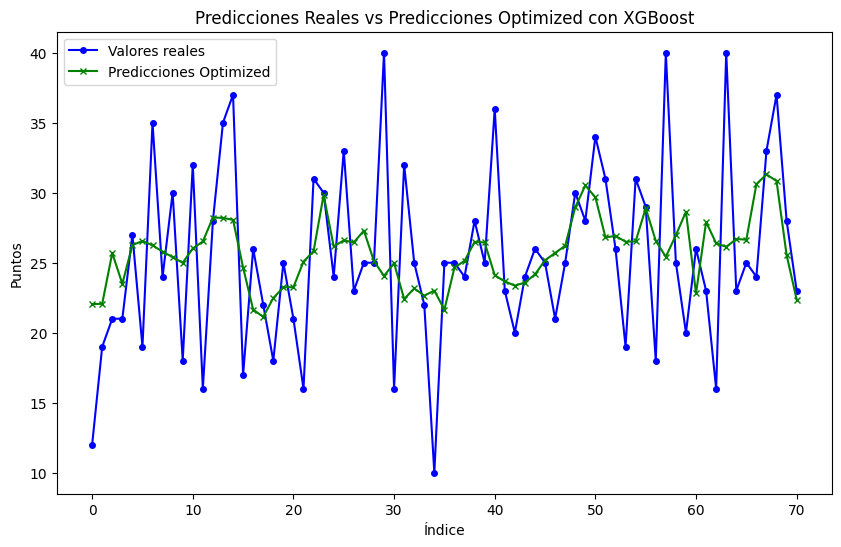

In [15]:
xgb_model = xgb.XGBRegressor(random_state=42)

# Definir los hiperparámetros a probar
param_grid = {
    'max_depth': [3, 6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 500],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Realizar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados
print("Mejores parámetros encontrados: ", grid_search.best_params_)

# Usar el mejor modelo encontrado para hacer predicciones
best_model = grid_search.best_estimator_

# Hacer predicciones con el modelo ajustado
y_pred_best = best_model.predict(X_test)

# Calcular las métricas de evaluación con el mejor modelo
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Imprimir los resultados del modelo con los mejores parámetros
print(f'Mean Squared Error (MSE) con el mejor modelo: {mse_best:.2f}')
print(f'Mean Absolute Error (MAE) con el mejor modelo: {mae_best:.2f}')

# Gráfico de predicciones vs valores reales con el modelo optimizado (GridSearchCV)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Valores reales", color='blue', linestyle='-', marker='o', markersize=4)
plt.plot(y_pred_best, label="Predicciones Optimized", color='green', linestyle='-', marker='x', markersize=4)
plt.xlabel('Índice')
plt.ylabel('Puntos')
plt.title('Predicciones Reales vs Predicciones Optimized con XGBoost')
plt.legend()
plt.show()


:( Not bad at all. But, we don`t arrive to the "outliers", we are always "in the middle". Very conservative predictions.

#### Conclusions

The models are not very good. They can't predict the most outlier points. But, the tendency of data is good predicted in my opinion.
Although the best RandomForest is the model with the smallest RMSE. I think that the final model we are going to choose is the LR, because is the easiest to explain, and his results are very similar than the xgb results.